### Modèle de traduction de langue 

In [2]:
from datasets import load_dataset
from transformers import AutoTokenizer
from mosestokenizer import *
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers import GRU, Dropout, Bidirectional, Embedding, Dense, TimeDistributed, Flatten
from keras import Input, Sequential, Model
from keras.activations import tanh
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.activations import tanh,softmax
from tqdm import tqdm
from keras import backend as K  #to Transpose

import seaborn as sns
sns.set()

from attention import BahdanauAttention
from encoder import Encoder
from decoder import Decoder
from seq2seq import s2s_translator
from data_process import Tokenizer_seq, token_to_word

C:\Users\steff\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Chargement de la base

In [3]:
books = load_dataset("opus_books", "en-fr")

Found cached dataset opus_books (C:/Users/steff/.cache/huggingface/datasets/opus_books/en-fr/1.0.0/e8f950a4f32dc39b7f9088908216cd2d7e21ac35f893d04d39eb594746af2daf)
100%|██████████| 1/1 [00:00<00:00, 199.94it/s]


In [4]:
fr_sentences = []
en_sentences = []
nb_sequences = 200
for n in range(len(books["train"][:nb_sequences]['translation'])):
    fr_sentences.append(books["train"][:nb_sequences]['translation'][n]['fr'])
    en_sentences.append(books["train"][:nb_sequences]['translation'][n]['en'])
print(fr_sentences[10])
print(en_sentences[10])
texts = en_sentences
max_tokens = 30

Ma mère faisait la petite classe.
My mother taught the infants.


#### Tokenisation des données

In [5]:
tokenizer_english = Tokenizer_seq(en_sentences, max_tokens)
print(tokenizer_english.tokens[10])
print(token_to_word(tokenizer_english.tokens[10], tokenizer_english))

tokenizer_francais = Tokenizer_seq(fr_sentences, max_tokens)
print(tokenizer_francais.tokens[10])
tokens = tokenizer_francais.tokens[10]
print(token_to_word(tokens, tokenizer_francais))

[ 21  58 476   1 477   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
['my', 'mother', 'taught', 'the', 'infants.']
[ 36  69 227   2  70 429   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
['ma', 'mère', 'faisait', 'la', 'petite', 'classe.']


#### Entrainement

In [6]:
voc_size_fr = tokenizer_francais.voc_size
voc_size_en = tokenizer_english.voc_size

embedding_size = 256
hidden_shape = 512
dropout = 0.5

epochs = 10
nb_batch = 10
input_words = 30

en_sentences = tokenizer_english.tokens
fr_sentences = tokenizer_francais.tokens

x_train, x_test, y_train, y_test = train_test_split(en_sentences, fr_sentences, test_size=0.33)

query = tf.convert_to_tensor(x_train)
query = tf.cast(query, tf.float32)
target = tf.convert_to_tensor(y_train)
target = tf.cast(query, tf.float32)

print("input shape :", np.shape(query))
print("output shape :", np.shape(target), '\n')

s2s = s2s_translator (input_words, epochs, nb_batch, voc_size_fr, embedding_size, hidden_shape, dropout)
s2s.train(x_train, y_train)

input shape : (134, 30)
output shape : (134, 30) 






  0%|          | 0/11 [00:00<?, ?it/s]

  9%|▉         | 1/11 [00:02<00:22,  2.23s/it]

 18%|█▊        | 2/11 [00:04<00:19,  2.11s/it]

 27%|██▋       | 3/11 [00:06<00:17,  2.13s/it]

 36%|███▋      | 4/11 [00:08<00:14,  2.06s/it]

 45%|████▌     | 5/11 [00:10<00:12,  2.05s/it]

 55%|█████▍    | 6/11 [00:12<00:10,  2.03s/it]

 64%|██████▎   | 7/11 [00:14<00:08,  2.08s/it]

 73%|███████▎  | 8/11 [00:16<00:06,  2.08s/it]

 82%|████████▏ | 9/11 [00:18<00:04,  2.09s/it]

 91%|█████████ | 10/11 [00:20<00:02,  2.06s/it]

  0%|          | 0/11 [00:00<?, ?it/s]

  9%|▉         | 1/11 [00:02<00:22,  2.27s/it]

 18%|█▊        | 2/11 [00:04<00:19,  2.15s/it]

 27%|██▋       | 3/11 [00:06<00:16,  2.11s/it]

 36%|███▋      | 4/11 [00:08<00:14,  2.10s/it]

 45%|████▌     | 5/11 [00:10<00:12,  2.12s/it]

 55%|█████▍    | 6/11 [00:12<00:10,  2.07s/it]

 64%|██████▎   | 7/11 [00:14<00:08,  2.10s/it]

 73%|███████▎  | 8/11 [00:16<00:06,  2.05s/it]

 82%|████████▏ | 9/11 [00:18<00:04,  2.04s/it]

 91%|█████████ | 10/11 [00:20<00:02,  2.01s/it]

  0%|          | 0/11 [00:00<?, ?it/s]

  9%|▉         | 1/11 [00:02<00:20,  2.02s/it]

 18%|█▊        | 2/11 [00:04<00:18,  2.01s/it]

 27%|██▋       | 3/11 [00:05<00:15,  1.98s/it]

 36%|███▋      | 4/11 [00:07<00:13,  1.95s/it]

 45%|████▌     | 5/11 [00:09<00:11,  1.93s/it]

 55%|█████▍    | 6/11 [00:11<00:09,  1.92s/it]

 64%|██████▎   | 7/11 [00:13<00:07,  1.91s/it]

 73%|███████▎  | 8/11 [00:15<00:05,  1.90s/it]

 82%|████████▏ | 9/11 [00:17<00:03,  1.90s/it]

 91%|█████████ | 10/11 [00:19<00:01,  1.92s/it]

  0%|          | 0/11 [00:00<?, ?it/s]

  9%|▉         | 1/11 [00:02<00:20,  2.00s/it]

 18%|█▊        | 2/11 [00:03<00:17,  1.96s/it]

 27%|██▋       | 3/11 [00:05<00:15,  1.93s/it]

 36%|███▋      | 4/11 [00:07<00:13,  1.91s/it]

 45%|████▌     | 5/11 [00:09<00:11,  1.90s/it]

 55%|█████▍    | 6/11 [00:11<00:09,  1.89s/it]

 64%|██████▎   | 7/11 [00:13<00:07,  1.92s/it]

 73%|███████▎  | 8/11 [00:15<00:05,  1.91s/it]

 82%|████████▏ | 9/11 [00:17<00:03,  1.90s/it]

 91%|█████████ | 10/11 [00:19<00:01,  1.89s/it]

  0%|          | 0/11 [00:00<?, ?it/s]

  9%|▉         | 1/11 [00:01<00:18,  1.89s/it]

 18%|█▊        | 2/11 [00:03<00:17,  1.89s/it]

 27%|██▋       | 3/11 [00:05<00:15,  1.88s/it]

 36%|███▋      | 4/11 [00:07<00:13,  1.87s/it]

 45%|████▌     | 5/11 [00:09<00:11,  1.87s/it]

 55%|█████▍    | 6/11 [00:11<00:09,  1.85s/it]

 64%|██████▎   | 7/11 [00:13<00:07,  1.85s/it]

 73%|███████▎  | 8/11 [00:14<00:05,  1.86s/it]

 82%|████████▏ | 9/11 [00:16<00:03,  1.86s/it]

 91%|█████████ | 10/11 [00:18<00:01,  1.85s/it]

  0%|          | 0/11 [00:00<?, ?it/s]

  9%|▉         | 1/11 [00:01<00:18,  1.85s/it]

 18%|█▊        | 2/11 [00:03<00:16,  1.85s/it]

 27%|██▋       | 3/11 [00:05<00:14,  1.85s/it]

 36%|███▋      | 4/11 [00:07<00:12,  1.85s/it]

 45%|████▌     | 5/11 [00:09<00:11,  1.86s/it]

 55%|█████▍    | 6/11 [00:11<00:09,  1.85s/it]

 64%|██████▎   | 7/11 [00:12<00:07,  1.85s/it]

 73%|███████▎  | 8/11 [00:14<00:05,  1.85s/it]

 82%|████████▏ | 9/11 [00:16<00:03,  1.85s/it]

 91%|█████████ | 10/11 [00:18<00:01,  1.89s/it]

  0%|          | 0/11 [00:00<?, ?it/s]

  9%|▉         | 1/11 [00:01<00:18,  1.86s/it]

 18%|█▊        | 2/11 [00:03<00:16,  1.85s/it]

 27%|██▋       | 3/11 [00:05<00:14,  1.86s/it]

 36%|███▋      | 4/11 [00:07<00:12,  1.86s/it]

 45%|████▌     | 5/11 [00:09<00:11,  1.86s/it]

 55%|█████▍    | 6/11 [00:11<00:09,  1.86s/it]

 64%|██████▎   | 7/11 [00:13<00:07,  1.86s/it]

 73%|███████▎  | 8/11 [00:14<00:05,  1.86s/it]

 82%|████████▏ | 9/11 [00:16<00:03,  1.87s/it]

 91%|█████████ | 10/11 [00:18<00:01,  1.87s/it]

  0%|          | 0/11 [00:00<?, ?it/s]

  9%|▉         | 1/11 [00:01<00:18,  1.88s/it]

 18%|█▊        | 2/11 [00:03<00:16,  1.88s/it]

 27%|██▋       | 3/11 [00:05<00:15,  1.88s/it]

 36%|███▋      | 4/11 [00:07<00:13,  1.89s/it]

 45%|████▌     | 5/11 [00:09<00:11,  1.92s/it]

 55%|█████▍    | 6/11 [00:11<00:09,  1.95s/it]

 64%|██████▎   | 7/11 [00:13<00:07,  1.93s/it]

 73%|███████▎  | 8/11 [00:15<00:05,  1.92s/it]

 82%|████████▏ | 9/11 [00:17<00:03,  1.95s/it]

 91%|█████████ | 10/11 [00:19<00:02,  2.04s/it]

  0%|          | 0/11 [00:00<?, ?it/s]

  9%|▉         | 1/11 [00:02<00:20,  2.05s/it]

 18%|█▊        | 2/11 [00:04<00:18,  2.01s/it]

 27%|██▋       | 3/11 [00:05<00:15,  1.96s/it]

 36%|███▋      | 4/11 [00:07<00:13,  1.99s/it]

 45%|████▌     | 5/11 [00:10<00:12,  2.01s/it]

 55%|█████▍    | 6/11 [00:12<00:10,  2.02s/it]

 64%|██████▎   | 7/11 [00:14<00:08,  2.09s/it]

 73%|███████▎  | 8/11 [00:16<00:06,  2.16s/it]

 82%|████████▏ | 9/11 [00:18<00:04,  2.15s/it]

 91%|█████████ | 10/11 [00:20<00:02,  2.09s/it]

  0%|          | 0/11 [00:00<?, ?it/s]

  9%|▉         | 1/11 [00:01<00:18,  1.87s/it]

 18%|█▊        | 2/11 [00:03<00:16,  1.89s/it]

 27%|██▋       | 3/11 [00:06<00:16,  2.06s/it]

 36%|███▋      | 4/11 [00:08<00:14,  2.02s/it]

 45%|████▌     | 5/11 [00:09<00:11,  1.99s/it]

 55%|█████▍    | 6/11 [00:11<00:09,  1.97s/it]

 64%|██████▎   | 7/11 [00:13<00:07,  1.97s/it]

 73%|███████▎  | 8/11 [00:15<00:06,  2.01s/it]

 82%|████████▏ | 9/11 [00:17<00:04,  2.02s/it]

 91%|█████████ | 10/11 [00:19<00:01,  1.99s/it]

100%|██████████| 11/11 [00:21<00:00,  1.96s/it]

INFO:tensorflow:Assets written to: encoder_model\assets


INFO:tensorflow:Assets written to: encoder_model\assets


INFO:tensorflow:Assets written to: decoder_model\assets


INFO:tensorflow:Assets written to: decoder_model\assets


#### Résultats 

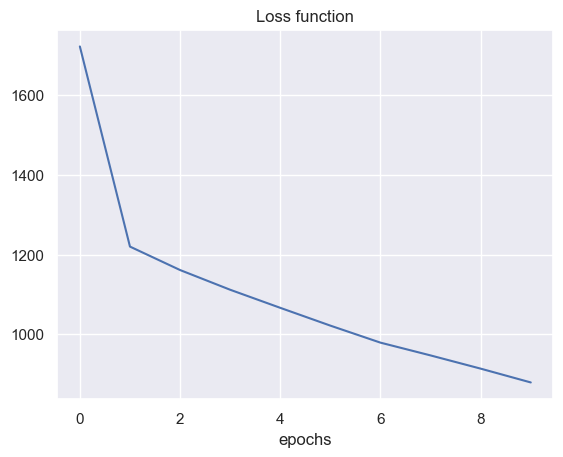

In [10]:
plt.plot(s2s.loss_history)
plt.xlabel("epochs")
plt.title("Loss function")
# plt.grid()
plt.show()

In [11]:
y_predict = s2s.translate_sentences(x_test[:1], y_test[:1])


In [12]:
print(token_to_word(x_test[1], tokenizer_english))
print(token_to_word(y_test[1], tokenizer_francais))
print(token_to_word(y_predict[0], tokenizer_francais))

['but', 'some', 'one', 'has', 'come', 'who', 'has', 'taken', 'from', 'me', 'these', 'peaceful,', 'childlike', 'delights.']
['mais', 'quelqu’un', 'est', 'venu', 'qui', 'm’a', 'enlevé', 'à', 'tous', 'ces', 'plaisirs', 'd’enfant', 'paisible.']
['le', 'le', 'le', 'le', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'la', 'la', 'et', 'le', 'de', 'la', 'de']


Il nous manquerait le temps d'apprendre à notre modèle avec plus d'exemples. Le modèle apprend mais n'est actuellement pas assez performant pour traduire.
